In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
!pip install autodistill-grounded-sam autodistill-yolov8
!pip install roboflow
!pip install autodistill-grounded-sam-2


In [6]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt

import pygame
print(pygame.__version__)

from autodistill_grounded_sam import GroundedSAM



2.6.1


Video Properties: FPS=10, Width=2560, Height=1440, Frames=698


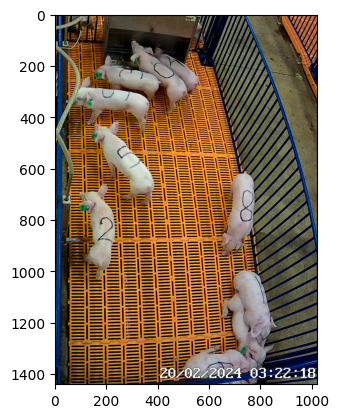

In [7]:
import cv2
import matplotlib.pyplot as plt

# Define input video path
input_path = "/content/drive/MyDrive/SAM/1min.mp4" ###Put the sample video "1min.mp4" into the folder "SAM"

# Open the video
video = cv2.VideoCapture(input_path)

# Check if the video opened successfully
if not video.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video Properties: FPS={fps}, Width={width}, Height={height}, Frames={total_frames}")

# Define crop region (x1, y1, x2, y2)
x1, y1, x2, y2 = 1280, 0, 2300, 1440

# Read a specific frame (e.g., frame at 1 second)
frame_time_in_seconds = 50
frame_to_read = int(frame_time_in_seconds * fps)

video.set(cv2.CAP_PROP_POS_FRAMES, frame_to_read)
ret, frame = video.read()

if ret:
    # Crop the frame
    cropped_frame = frame[y1:y2, x1:x2]

    # Convert BGR to RGB for displaying with Matplotlib
    cropped_frame_rgb = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB)

    # Display the frame using Matplotlib
    plt.imshow(cropped_frame_rgb)
    # plt.axis("off")
    plt.show()
else:
    print(f"Error: Could not read frame {frame_to_read}")

# Release the video object
video.release()


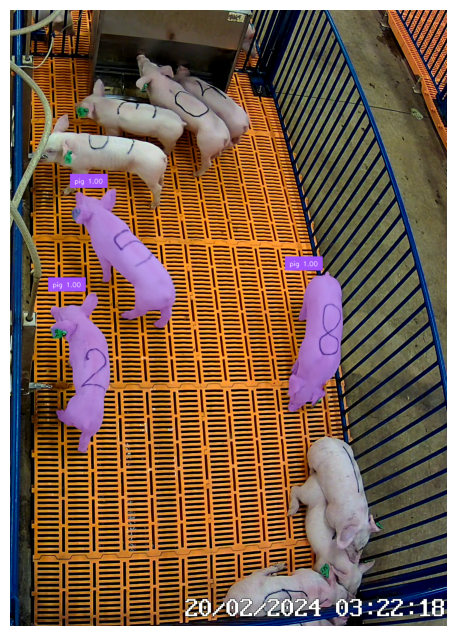

In [9]:
# define an ontology to map class names to our Grounded SAM 2 prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
# then, load the model

base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {
            # "Label pig with back number 0 as": "pig0",
            # "Label pig with back number 1 as": "pig1",
            # "Label pig with back number 2 as": "pig2",
            # "Label pig with back number 3 as": "pig3",
            # "Label pig with back number 4 as": "pig4",
            # "Label pig with back number 5 as": "pig5",
            # "Label pig with back number 6 as": "pig6",
            # "Label pig with back number 7 as": "pig7",
            # "Label pig with back number 8 as": "pig8",
            # "Label pig with back number 9 as": "pig9",
            'pig': 'pig',

        }
    )
)

# run inference on a single image
results = base_model.predict(cropped_frame)

plot(
    # image=cv2.imread(img),
    image = cropped_frame,
    classes=base_model.ontology.classes(),
    detections=results
)
# label all images in a folder called `context_images`
# base_model.label("./context_images", extension=".jpeg")

## Grounding DINO

In [ ]:
# !pip install autodistill_grounding_dino
# !pip install roboflow

In [7]:
from autodistill.detection import CaptionOntology
from autodistill.utils import plot

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


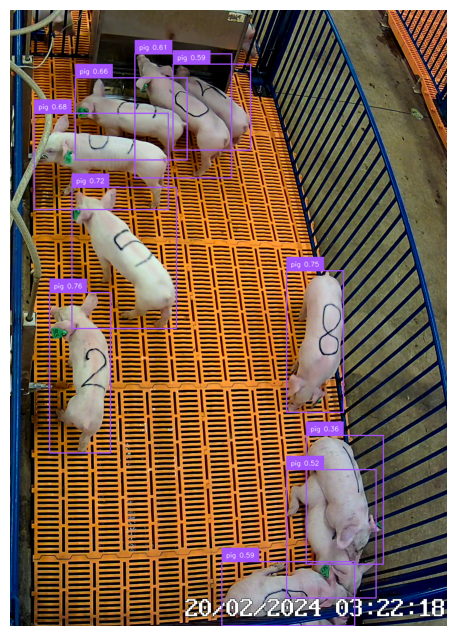

Labeling images: 0it [00:00, ?it/s]

Labeled dataset created - ready for distillation.


In [12]:
from autodistill_grounding_dino import GroundingDINO
from autodistill.detection import CaptionOntology


# define an ontology to map class names to our GroundingDINO prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
# then, load the model
# base_model = GroundingDINO(ontology=CaptionOntology({"shipping container": "container"}))


base_model=GroundingDINO(
    ontology=CaptionOntology(
        {
            # "Label pig with back number 0 as": "pig0",
            # "Label pig with back number 1 as": "pig1",
            # "Label pig with back number 2 as": "pig2",
            # "Label pig with back number 3 as": "pig3",
            # "Label pig with back number 4 as": "pig4",
            # "Label pig with back number 5 as": "pig5",
            # "Label pig with back number 6 as": "pig6",
            # "Label pig with back number 7 as": "pig7",
            # "Label pig with back number 8 as": "pig8",
            # "Label pig with back number 9 as": "pig9",
            'pig': 'pig',

        }
    )
)

# run inference on a single image
results = base_model.predict(cropped_frame)

plot(
    # image=cv2.imread(img),
    image = cropped_frame,
    classes=base_model.ontology.classes(),
    detections=results
)
# label all images in a folder called `context_images`
base_model.label("./context_images", extension=".jpeg")
